In [5]:
%matplotlib notebook

from numpy import *
from os import path
home = path.expanduser("~")

import matplotlib.pyplot as plt

width = 0.05
plotMarkerSize = 8
labelfontsize = 15

# change the following line to your working folder
working_path = '/Users/chunshen/Desktop/JETSCAPE/JETSCAPE-public/build'

In [6]:
# load the data table(s)
data = loadtxt(path.join(working_path, "momentum_anisotropy_eta_-0.5_0.5.dat"))

### Averaged temperature evolution as a function of $\tau$

<IPython.core.display.Javascript object>


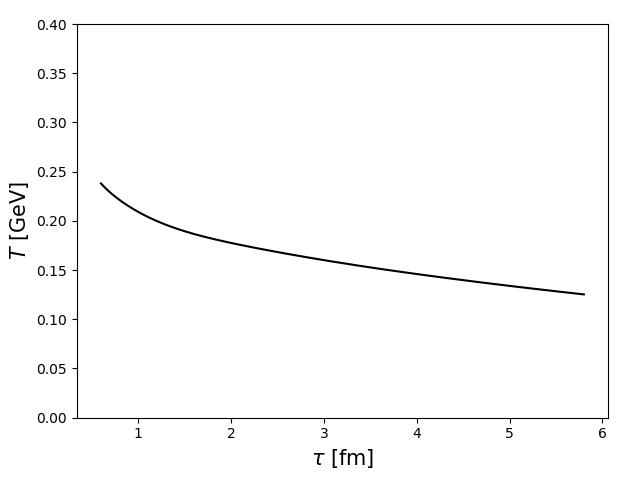

In [7]:
fig = plt.figure()
ax = plt.axes([0.12, 0.13, 0.83, 0.82])
plt.plot(data[:, 0], data[:, -1], '-k')
plt.xlabel(r"$\tau$ [fm]", fontsize=labelfontsize)
plt.ylabel(r"$T$ [GeV]", fontsize=labelfontsize)
plt.ylim([0, 0.4])
#plt.savefig(path.join(home, 'Desktop/avg_temperature_evo.pdf'), fmt='pdf')

### Averaged velocity as a function of $\tau$

<IPython.core.display.Javascript object>


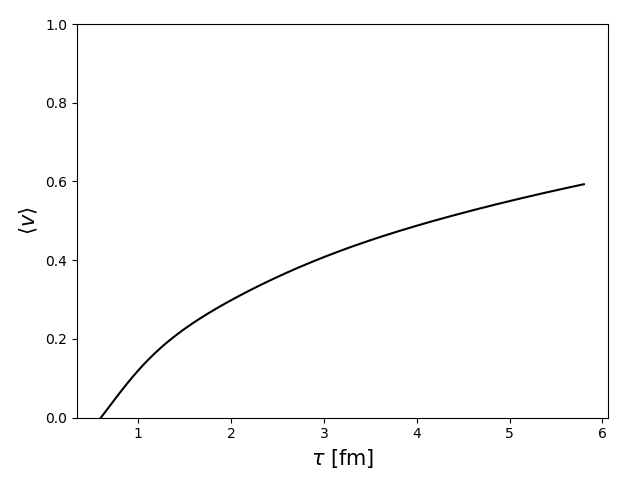

In [8]:
# compute the average transverse velocity
gamma = data[:, -2]
v_avg = sqrt(1. - 1./gamma**2.)

fig = plt.figure()
ax = plt.axes([0.12, 0.13, 0.83, 0.82])
plt.plot(data[:, 0], v_avg, '-k')
plt.xlabel(r"$\tau$ [fm]", fontsize=labelfontsize)
plt.ylabel(r"$\langle v \rangle$", fontsize=labelfontsize)
plt.ylim([0, 1.0])
#plt.savefig(path.join(home, 'Desktop/avg_v_evo.pdf'), fmt='pdf')